In [1]:
cd /content/sample_data/Test

/content/sample_data/Test


In [2]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0
 96% 211M/219M [00:01<00:00, 163MB/s]
100% 219M/219M [00:01<00:00, 127MB/s]


In [3]:
!unzip /content/sample_data/Test/rice-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

In [4]:
## importing essential Libraries

import os
import pandas as pd
import numpy as np
import sys
import seaborn as sb
import tensorflow as tf
from tensorflow.keras import layers, models, backend
import matplotlib.pyplot as plt

## batch specification
batch_size = 50
img_height = 300
img_width = 300


## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/sample_data/Test/Rice_Image_Dataset',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/sample_data/Test/Rice_Image_Dataset',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)


class_names = training_ds.class_names

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


In [5]:
class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

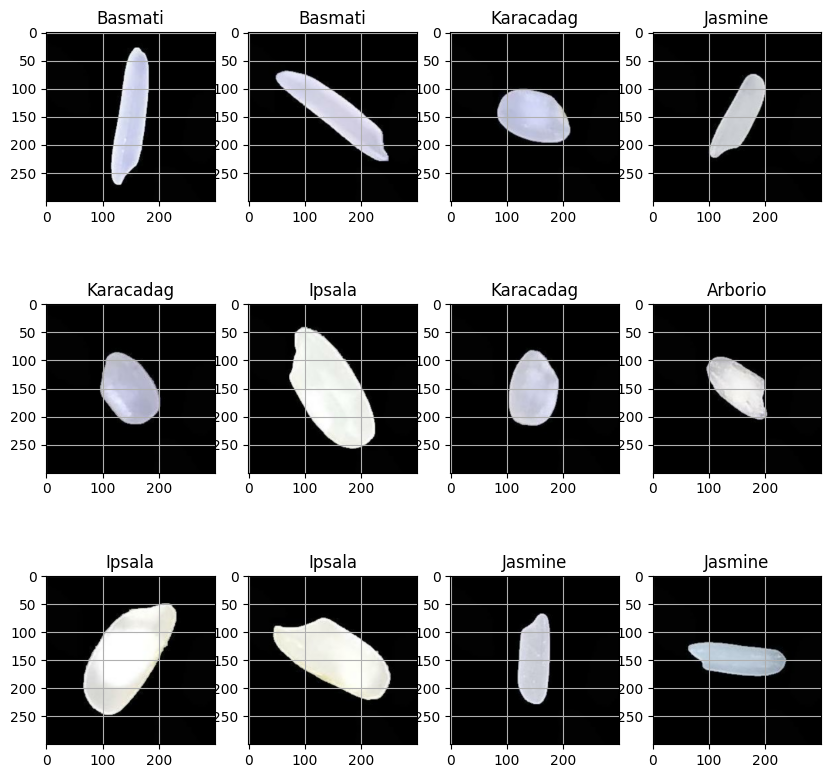

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [12]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width,3)),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(32, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 149, 149, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 73, 73, 32)       

In [16]:
epochs = 10
history = model.fit(
training_ds,
validation_data=testing_ds,
epochs=epochs
)

Epoch 1/10
1200/1200 [==============================] - 166s 138ms/step - loss: 0.6362 - accuracy: 0.7229 - val_loss: 12.8578 - val_accuracy: 0.4652
Epoch 2/10
1200/1200 [==============================] - 166s 138ms/step - loss: 0.4692 - accuracy: 0.8053 - val_loss: 0.3317 - val_accuracy: 0.8697
Epoch 3/10
1200/1200 [==============================] - 164s 136ms/step - loss: 0.3849 - accuracy: 0.8415 - val_loss: 0.7812 - val_accuracy: 0.8159
Epoch 4/10
1200/1200 [==============================] - 121s 100ms/step - loss: 0.3032 - accuracy: 0.8715 - val_loss: 0.9466 - val_accuracy: 0.9191
Epoch 5/10
1200/1200 [==============================] - 144s 119ms/step - loss: 0.2594 - accuracy: 0.8902 - val_loss: 3.2203 - val_accuracy: 0.5735
Epoch 6/10
1200/1200 [==============================] - 143s 119ms/step - loss: 0.2340 - accuracy: 0.9070 - val_loss: 0.9854 - val_accuracy: 0.7523
Epoch 7/10
1200/1200 [==============================] - 128s 106ms/step - loss: 0.1898 - accuracy: 0.9285 - val

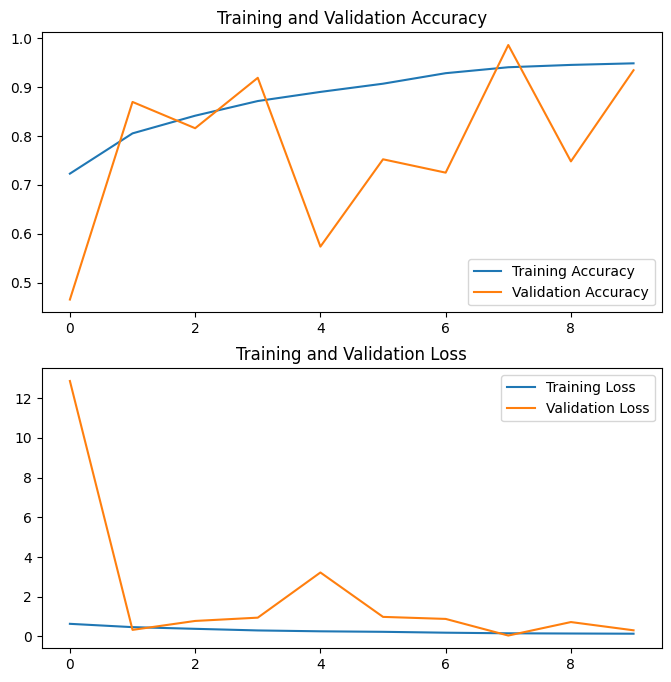

Maximum Validation Accuracy: 0.9861999750137329


In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Display the maximum validation accuracy
print("Maximum Validation Accuracy:", max(val_acc))

2/2 [==============================] - 1s 266ms/step


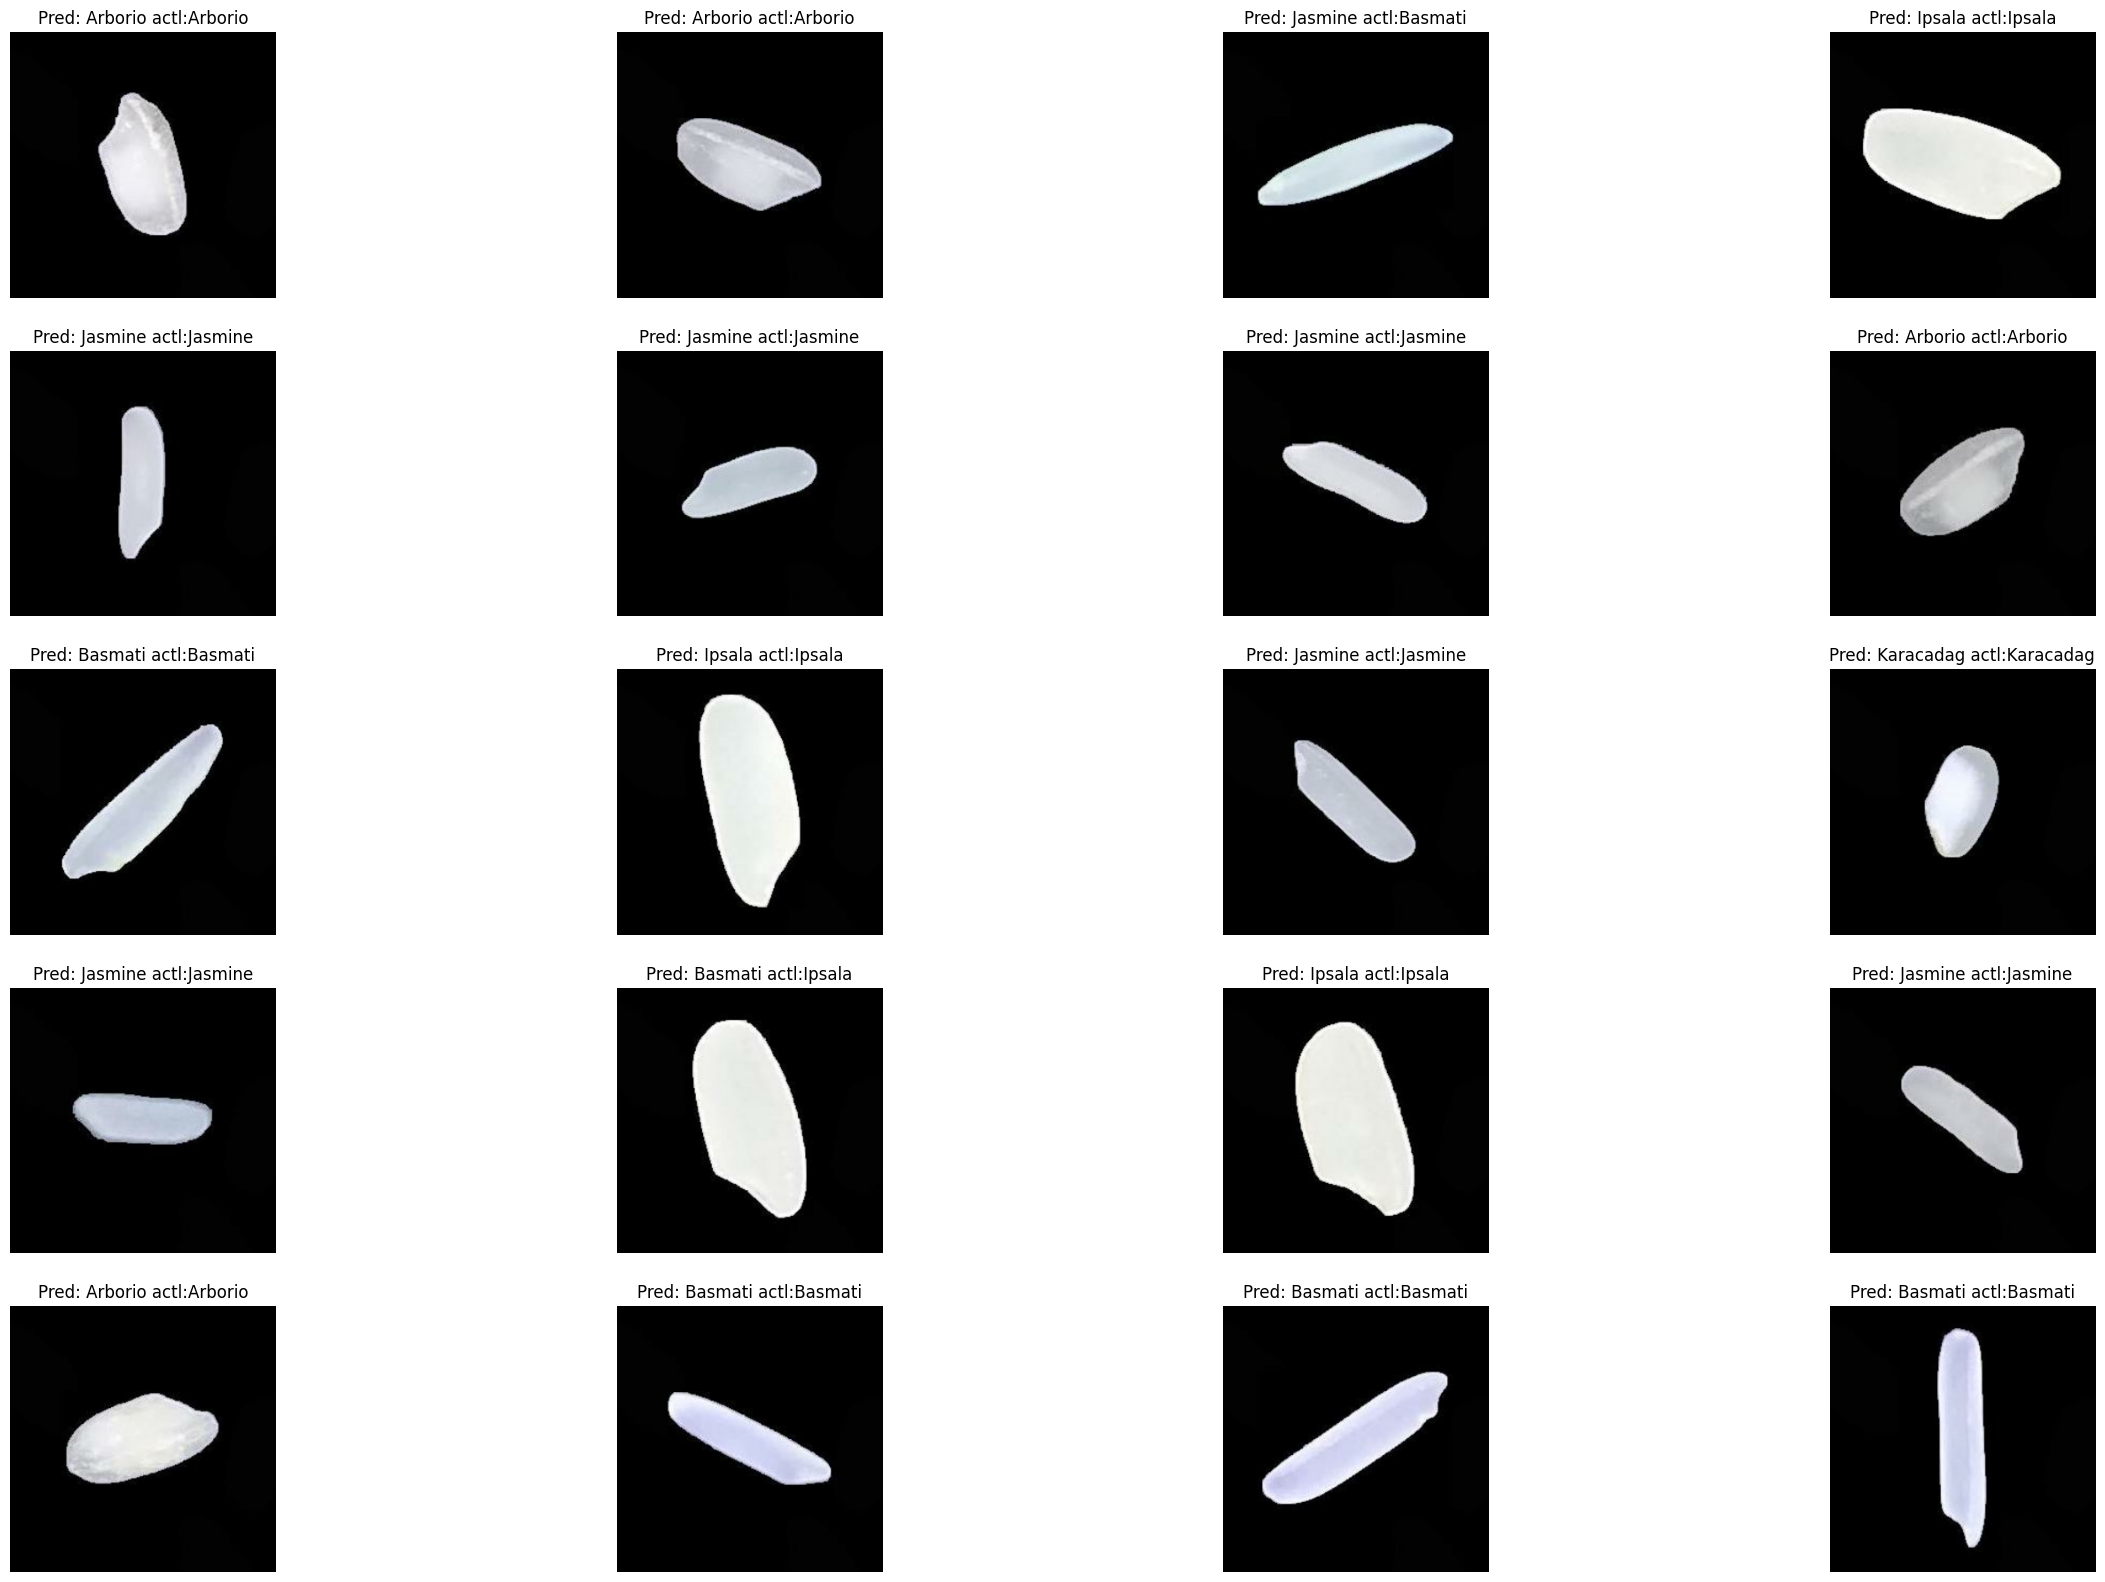

In [18]:
AccuracyVector = []
plt.figure(figsize=(30, 20))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)


In [19]:
model.save('riceclassificationmodel.h5',include_optimizer=True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
